In [47]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [48]:
sns.set_style('darkgrid')

In [49]:
df = pd.read_csv("convexhull.csv")
df = df.drop(columns=['Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7'])  # Drop unnecessary columns

print(df.head())

   num_point  time_sort  time_convex  time_convex_pred  residual
0          1        0.0     0.000000          0.000000  0.000000
1          4        0.0     0.000000          0.000004  0.000004
2          9        0.0     0.000000          0.000016  0.000016
3         16        0.0     0.000500          0.000035  0.000035
4         25        0.0     0.000498          0.000063  0.000063


In [50]:
# Adjust independent var (num_point) to be on nlogn scale
df['num_point_nlogn'] = df['num_point'] * df['num_point'] * np.log2(df['num_point'])

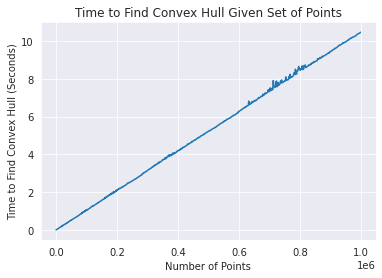

In [51]:
g = sns.lineplot(x='num_point',
                    y='time_convex',
                    data = df)

g.set(xlabel='Number of Points',
      ylabel='Time to Find Convex Hull (Seconds)',
      title='Time to Find Convex Hull Given Set of Points')
plt.show()

# fig = g.get_figure()
# fig.savefig('fig1.png', dpi=600)

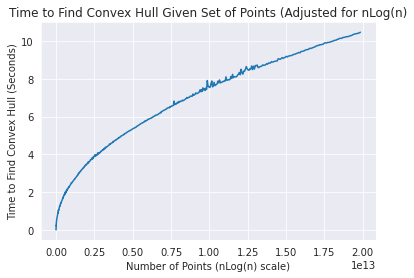

In [52]:
g = sns.lineplot(x='num_point_nlogn',
                 y='time_convex',
                 data = df)

g.set(xlabel='Number of Points (nLog(n) scale)',
      ylabel='Time to Find Convex Hull (Seconds)',
      title='Time to Find Convex Hull Given Set of Points (Adjusted for nLog(n)')
plt.show(g)

# fig = g.get_figure()
# fig.savefig('fig2.png', dpi=600)

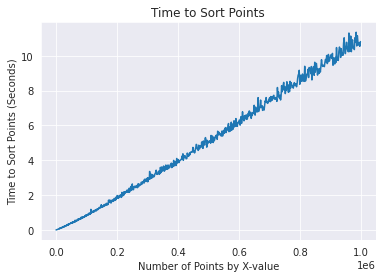

In [53]:
g = sns.lineplot(x='num_point',
                 y='time_sort',
                 data = df)

g.set(xlabel='Number of Points by X-value',
      ylabel='Time to Sort Points (Seconds)',
      title='Time to Sort Points')
plt.show(g)

# fig = g.get_figure()
# fig.savefig('fig3.png', dpi=600)

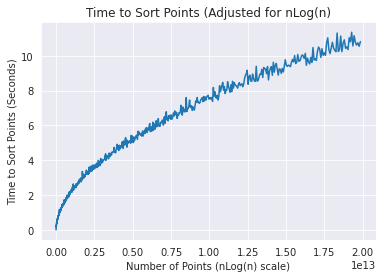

In [54]:
g = sns.lineplot(x='num_point_nlogn',
                 y='time_sort',
                 data = df)

g.set(xlabel='Number of Points (nLog(n) scale)',
      ylabel='Time to Sort Points (Seconds)',
      title='Time to Sort Points (Adjusted for nLog(n)')
plt.show(g)

# fig = g.get_figure()
# fig.savefig('fig4.png', dpi=600)

   Number of Points variable  value
0                 1   Actual    0.0
1                 4   Actual    0.0
2                 9   Actual    0.0
3                16   Actual    0.0
4                25   Actual    0.0


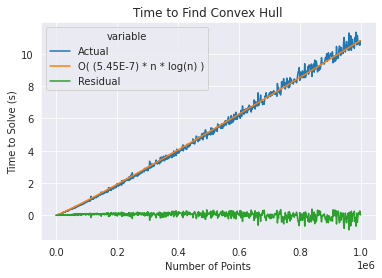

In [55]:
df = pd.read_csv("predicting-values.csv")

df.columns = ['Number of Points', 'Actual', 'O( (5.45E-7) * n * log(n) )', 'Residual']

data=pd.melt(df, 'Number of Points')

print(data.head())

g = sns.lineplot(x='Number of Points',
                 y='value',
                 hue='variable',
                 data=data)

g.set(xlabel='Number of Points',
      ylabel='Time to Solve (s)',
      title='Time to Find Convex Hull')

plt.show()

# fig = g.get_figure()
# fig.savefig('final.png', dpi=600)